# Kernel Density Estimation

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

Drawing 1000 samples from p(x) = P1.p1(x) + P2.p2(x) where,
*   P1 = 0.6
*   P2 = 0.4
*   p1(x) ~ N(5,10)
*   p2(x) ~ N(10,15)

Drawing a histogram for the obtained data.

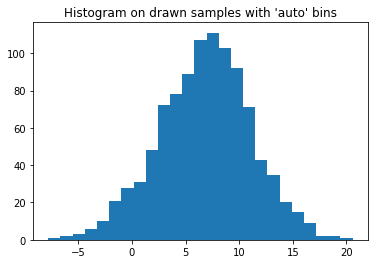

In [158]:
# Calculating mean and variance for new Normal distribution
# obtained by weighted sum of given normal distributions
# reference of new means and vars - https://stats.stackexchange.com/questions/205126/standard-deviation-for-weighted-sum-of-normal-distributions 

# new mean and variance
myu = 0.6*5 + 0.4*10
var = 0.6*10 + 0.4*15 + 0.6*0.4*25
n = np.random.normal(myu,np.sqrt(var),1000)

# plotting histogram
plt.hist(n, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram on drawn samples with 'auto' bins")
plt.show()

# Using the KDE to estimate pdf of given samples

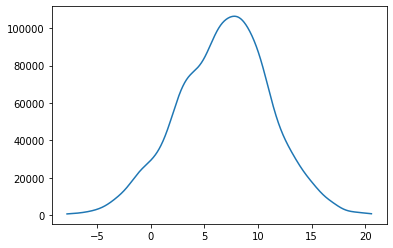

In [173]:
h = ((4*np.sqrt(var)**5)/3000)**(-1/5) # bandwidth
min = np.amin(n) # finding minimum value of 1000 samples for linspace
max = np.amax(n) # finding maximum value of 1000 samples for linspace
x = np.linspace(min, max, 1000) # a linearly spaced series of data points
kde = []

# obtaining kde values for all samples over linspace points
for i in range(len(x)) : 
  K_sum = 0.0
  # obtaining kernal summation for all sample points
  for j in range(len(n)) : 
    K_sum = K_sum + 1/(h * np.sqrt(2*np.pi)) * np.exp(-(x[i] - n[j])**2 / (2 * h**2)) 
  term = (1/h*1000) * K_sum
  kde.append(term)
plt.plot(x,kde)